<h1 align="center"> Telcom Churn: Classify </h1>

<img src="https://austindatascience.files.wordpress.com/2017/11/screen-shot-2017-11-19-at-4-00-11-pm.png" width="50%" />

Created: 2020-09-18

Last updated: 2020-09-19

Kaggle Kernel made by 🚀 <a href="https://www.kaggle.com/rafanthx13"> Rafael Morais de Assis</a>

## Problem Description

https://www.kaggle.com/blastchar/telco-customer-churn

## Table Of Content (TOC) <a id="top"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Configs
pd.options.display.float_format = '{:,.4f}'.format
sns.set(style="whitegrid")
plt.style.use('seaborn')
seed = 42
np.random.seed(seed)

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print("DataSet = {:,d} rows and {} columns".format(df.shape[0], df.shape[1]))

print("\nAll Columns:\n=>", df.columns.tolist())

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

print("\nStrings Variables:\n=>", qualitative,
      "\n\nNumerics Variables:\n=>", quantitative)

df.head(3)

DataSet = 7,043 rows and 21 columns

All Columns:
=> ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Strings Variables:
=> ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numerics Variables:
=> ['SeniorCitizen', 'tenure', 'MonthlyCharges']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes


## Snippets

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

this_labels = ['No Churn','Churn']
scoress = {}

def class_report(y_real, y_my_preds, name="", labels=this_labels):
    if(name != ''):
        print(name,"\n")
    print(confusion_matrix(y_real, y_my_preds), '\n')
    print(classification_report(y_real, y_my_preds, target_names=labels))
    scoress[name] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')]

In [4]:
import time

def time_spent(time0):
    t = time.time() - time0
    t_int = int(t) // 60
    t_min = t % 60
    if(t_int != 0):
        return '{} min {:.3f} s'.format(t_int, t_min)
    else:
        return '{:.3f} s'.format(t_min)

In [5]:
# statistics
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax #for some statistics
from scipy.special import boxcox1p

def test_normal_distribution(serie, series_name='series', thershold=0.4):
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=False)
    f.suptitle('{} is a Normal Distribution?'.format(series_name), fontsize=18)
    ax1.set_title("Histogram to " + series_name)
    ax2.set_title("Q-Q-Plot to "+ series_name)
    mu, sigma = norm.fit(serie)
    print('Normal dist. (mu= {:,.2f} and sigma= {:,.2f} )'.format(mu, sigma))
    skewness = serie.skew()
    kurtoise = serie.kurt()
    print("Skewness: {:,.2f} | Kurtosis: {:,.2f}".format(skewness, kurtoise))
    pre_text = '\t=> '
    if(skewness < 0):
        text = pre_text + 'negatively skewed or left-skewed'
    else:
        text =  pre_text + 'positively skewed or right-skewed\n'
        text += pre_text + 'in case of positive skewness, log transformations usually works well.\n'
        text += pre_text + 'np.log(), np.log1(), boxcox1p()'
    if(skewness < -1 or skewness > 1):
        print("Evaluate skewness: highly skewed")
        print(text)
    if( (skewness <= -0.5 and skewness > -1) or (skewness >= 0.5 and skewness < 1)):
        print("Evaluate skewness: moderately skewed")
        print(text)
    if(skewness >= -0.5 and skewness <= 0.5):
        print('Evaluate skewness: approximately symmetric')
    print('evaluate kurtoise')
    if(kurtoise > 3 + thershold):
        print(pre_text + 'Leptokurtic: anormal: Peak is higher')
    elif(kurtoise < 3 - thershold):
        print(pre_text + 'Platykurtic: anormal: The peak is lower')
    else:
        print(pre_text + 'Mesokurtic: normal: the peack is normal')
    sns.distplot(serie , fit=norm, ax=ax1)
    ax1.legend(['Normal dist. ($\mu=$ {:,.2f} and $\sigma=$ {:,.2f} )'.format(mu, sigma)],
            loc='best')
    ax1.set_ylabel('Frequency')
    stats.probplot(serie, plot=ax2)
    plt.show()

In [6]:
def plot_top_bottom_rank_correlation(my_df, column_target, top_rank=5, title=''):
    corr_matrix = my_df.corr()
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7), sharex=False)
    if(title):
        f.suptitle(title)

    ax1.set_title('Top {} Positive Corr to {}'.format(top_rank, column_target))
    ax2.set_title('Top {} Negative Corr to {}'.format(top_rank, column_target))
    
    cols_top = corr_matrix.nlargest(top_rank+1, column_target)[column_target].index
    cm = np.corrcoef(my_df[cols_top].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 11}, yticklabels=cols_top.values,
                     xticklabels=cols_top.values, mask=mask, ax=ax1)
    
    cols_bot = corr_matrix.nsmallest(top_rank, column_target)[column_target].index
    cols_bot  = cols_bot.insert(0, column_target)
    cm = np.corrcoef(my_df[cols_bot].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 11}, yticklabels=cols_bot.values,
                     xticklabels=cols_bot.values, mask=mask, ax=ax2)
    
    plt.show()

In [7]:
def check_balanced_train_test_binary(x_train, y_train, x_test, y_test, original_size, labels):
    """ To binary classification
    each paramethes is pandas.core.frame.DataFrame
    @total_size = len(X) before split
    @labels = labels in ordem [0,1 ...]
    """
    train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
    test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

    prop_train = train_counts_label/ len(y_train)
    prop_test = test_counts_label/ len(y_test)

    print("Original Size:", '{:,d}'.format(original_size))
    print("\nTrain: must be 80% of dataset:\n", 
          "the train dataset has {:,d} rows".format(len(x_train)),
          'this is ({:.2%}) of original dataset'.format(len(x_train)/original_size),
                "\n => Classe 0 ({}):".format(labels[0]), train_counts_label[0], '({:.2%})'.format(prop_train[0]), 
                "\n => Classe 1 ({}):".format(labels[1]), train_counts_label[1], '({:.2%})'.format(prop_train[1]),
          "\n\nTest: must be 20% of dataset:\n",
          "the test dataset has {:,d} rows".format(len(x_test)),
          'this is ({:.2%}) of original dataset'.format(len(x_test)/original_size),
                  "\n => Classe 0 ({}):".format(labels[0]), test_counts_label[0], '({:.2%})'.format(prop_test[0]),
                  "\n => Classe 1 ({}):".format(labels[1]),test_counts_label[1], '({:.2%})'.format(prop_test[1])
         )

In [8]:
def eda_categ_feat_desc_plot(series_categorical, title = "", fix_labels=False):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
       @fix_labels: The labes plot in barplot in sorted by values, some times its bugs cuz axis ticks is alphabethic
           if this happens, pass True in fix_labels
       @bar_format: pass {:,.0f} to int
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    if(fix_labels):
        val_concat = val_concat.sort_values(series_name).reset_index()
    
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], '{:,d}'.format(int(row['quantity'])), color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [9]:
def eda_numerical_feat(series, title="", with_label=True, number_format="", show_describe=False, size_labels=10):
    # Use 'series_remove_outiliers' to filter outiliers
    """ Generate series.describe(), bosplot and displot to a series
    @with_label: show labels in boxplot
    @number_format: 
        integer: 
            '{:d}'.format(42) => '42'
            '{:,d}'.format(12855787591251) => '12,855,787,591,251'
        float:
            '{:.0f}'.format(91.00000) => '91' # no decimal places
            '{:.2f}'.format(42.7668)  => '42.77' # two decimal places and round
            '{:,.4f}'.format(1285591251.78) => '1,285,591,251.7800'
            '{:.2%}'.format(0.09) => '9.00%' # Percentage Format
        string:
            ab = '$ {:,.4f}'.format(651.78) => '$ 651.7800'
    def swap(string, v1, v2):
        return string.replace(v1, "!").replace(v2, v1).replace('!',v2)
    # Using
        swap(ab, ',', '.')
    """
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5), sharex=False)
    if(show_describe):
        print(series.describe())
    if(title != ""):
        f.suptitle(title, fontsize=18)
    sns.distplot(series, ax=ax1)
    sns.boxplot(series, ax=ax2)
    if(with_label):
        describe = series.describe()
        labels = { 'min': describe.loc['min'], 'max': describe.loc['max'], 
              'Q1': describe.loc['25%'], 'Q2': describe.loc['50%'],
              'Q3': describe.loc['75%']}
        if(number_format != ""):
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + number_format.format(v), ha='center', va='center', fontweight='bold',
                         size=size_labels, color='white', bbox=dict(facecolor='#445A64'))
        else:
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + str(v), ha='center', va='center', fontweight='bold',
                     size=size_labels, color='white', bbox=dict(facecolor='#445A64'))
    plt.show()

## Data Cleaning

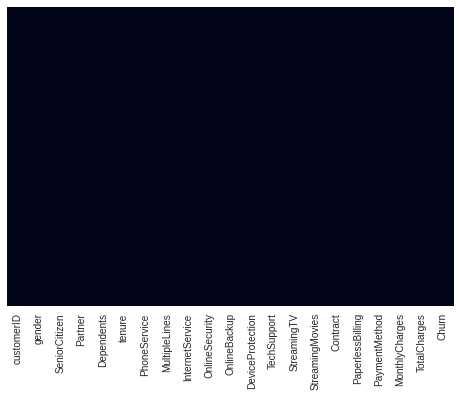

In [10]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [11]:
df.duplicated().sum()


0

In [50]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

## EDA

### Each feature individually

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


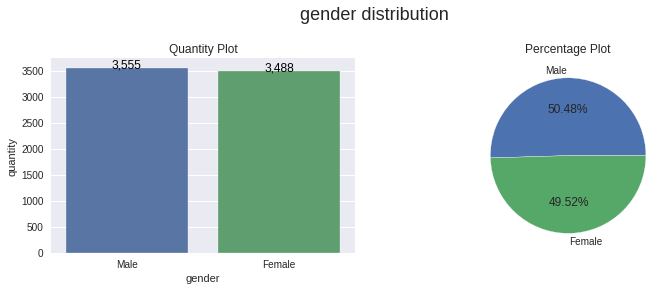

In [13]:
eda_categ_feat_desc_plot(df['gender'], title = "gender distribution")

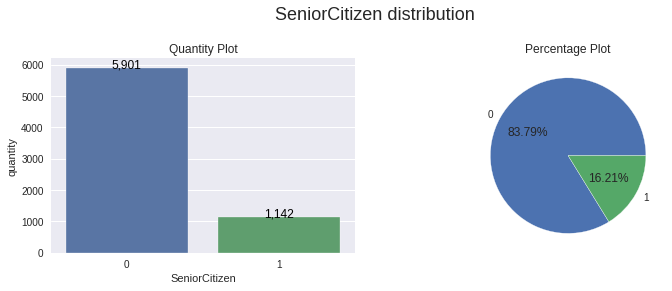

In [14]:
eda_categ_feat_desc_plot(df['SeniorCitizen'], title = "SeniorCitizen distribution")

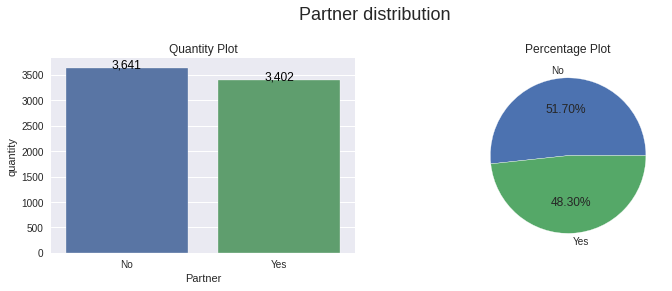

In [15]:
eda_categ_feat_desc_plot(df['Partner'], title = "Partner distribution")

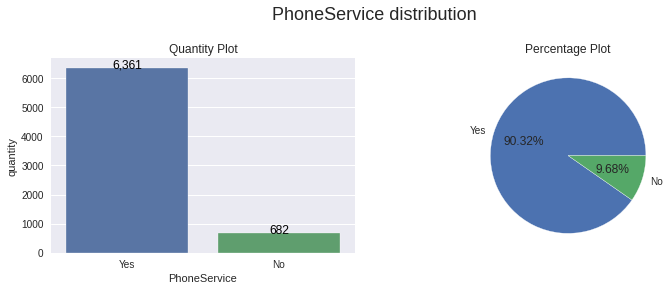

In [16]:
# PhoneService
eda_categ_feat_desc_plot(df['PhoneService'], title = "PhoneService distribution")

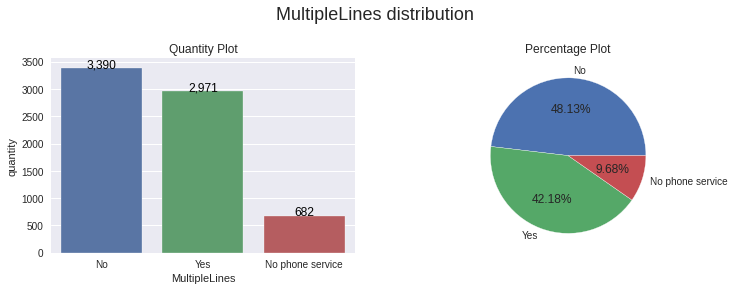

In [17]:
# PhoneService
eda_categ_feat_desc_plot(df['MultipleLines'], title = "MultipleLines distribution")

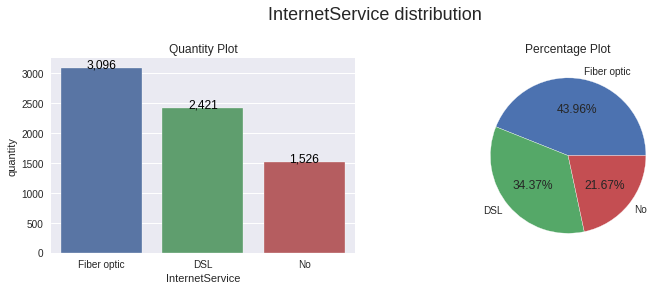

In [18]:
# PhoneService
eda_categ_feat_desc_plot(df['InternetService'], title = "InternetService distribution")

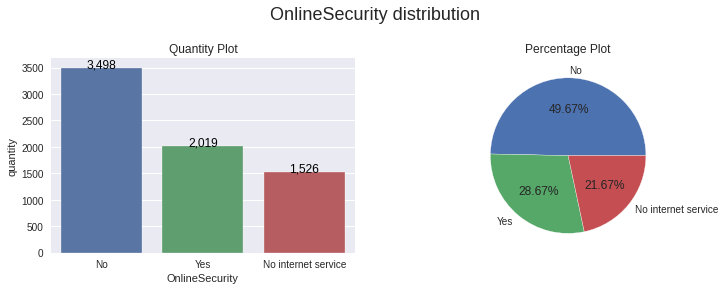

In [19]:
# PhoneService
eda_categ_feat_desc_plot(df['OnlineSecurity'], title = "OnlineSecurity distribution")

In [20]:
# InternetService


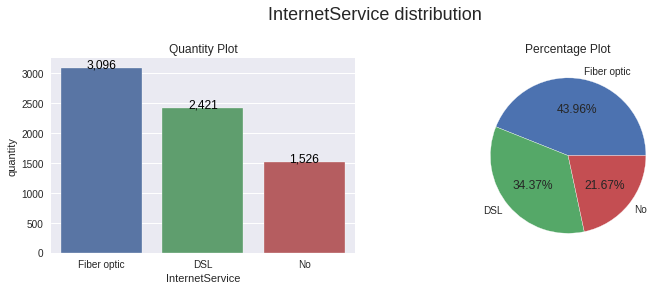

In [21]:
# InternetService
eda_categ_feat_desc_plot(df['InternetService'], title = "InternetService distribution")

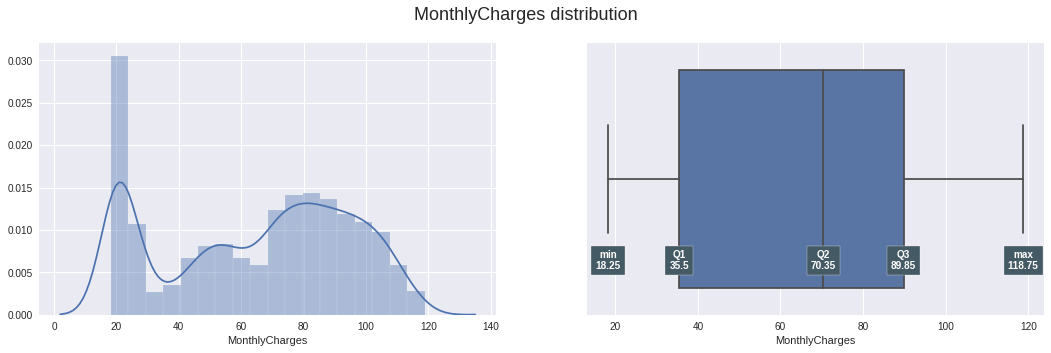

In [22]:
eda_numerical_feat(df['MonthlyCharges'], title="MonthlyCharges distribution")

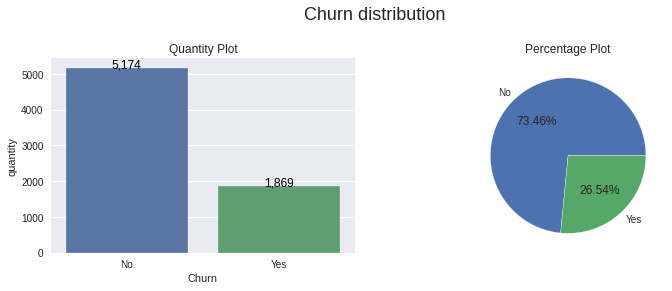

In [23]:
eda_categ_feat_desc_plot(df['Churn'], title = "Churn distribution")

### Churn by other features

## Correlations

In [24]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [25]:
yes_no = {'No':0, 'Yes': 1}
gender = {'Female':0, 'Male':1}

df1 = df.copy().drop(['customerID'], axis=1)

df1['Churn'] = df1['Churn'].replace(yes_no)
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace(yes_no)
df1['Partner'] = df1['Partner'].replace(yes_no)
df1['Dependents'] = df1['Dependents'].replace(yes_no)
df1['PhoneService'] = df1['PhoneService'].replace(yes_no)

df1['gender'] = df1['gender'].replace(gender)

multiple_lines = pd.get_dummies(df1['MultipleLines'], prefix='ML')
internet_service = pd.get_dummies(df1['InternetService'], prefix='IS')
online_security = pd.get_dummies(df1['OnlineSecurity'], prefix='OS')
online_backup = pd.get_dummies(df1['OnlineBackup'], prefix='OB')

device_protection = pd.get_dummies(df1['DeviceProtection'], prefix='DP')
tech_support = pd.get_dummies(df1['TechSupport'], prefix='TS')
streaming_tv = pd.get_dummies(df1['StreamingTV'], prefix='ST')
streaming_movies = pd.get_dummies(df1['StreamingMovies'], prefix='SM')

contract = pd.get_dummies(df1['Contract'], prefix='Contr')
payment_method = pd.get_dummies(df1['PaymentMethod'], prefix='PM')

dummies_columns = [multiple_lines, internet_service, online_security, online_backup,
                  device_protection, tech_support, streaming_tv, streaming_movies,
                  contract, payment_method]

df1['TotalCharges'] = df1['TotalCharges'].replace(" ", 0).astype('float32')

df1 = pd.concat([df1, *dummies_columns], axis=1)

df1 = df1.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaymentMethod'], axis=1)

df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,SM_No,SM_No internet service,SM_Yes,Contr_Month-to-month,Contr_One year,Contr_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
0,0,0,1,0,1,0,1,29.8500,29.8500,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.9500,"1,889.5000",0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.8500,108.1500,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.3000,"1,840.7500",0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.7000,151.6500,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.8000,"1,990.5000",0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.2000,"7,362.8999",0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.6000,346.4500,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.4000,306.6000,1,...,1,0,0,1,0,0,0,0,0,1


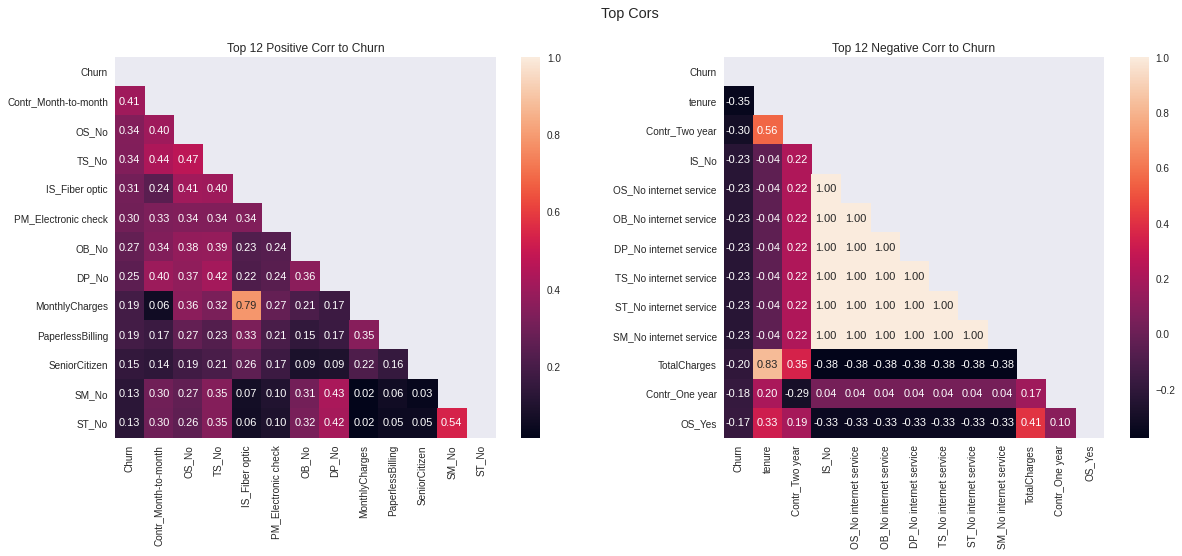

In [26]:
abc = plot_top_bottom_rank_correlation(df1, 'Churn', top_rank=12, title='Top Cors')

## Split Train and Test

In [27]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,SM_No,SM_No internet service,SM_Yes,Contr_Month-to-month,Contr_One year,Contr_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
0,0,0,1,0,1,0,1,29.8500,29.8500,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.9500,"1,889.5000",0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.8500,108.1500,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.3000,"1,840.7500",0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.7000,151.6500,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.8000,"1,990.5000",0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.2000,"7,362.8999",0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.6000,346.4500,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.4000,306.6000,1,...,1,0,0,1,0,0,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Churn'], axis=1)

y = df1['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y.values, test_size=0.20, random_state=42)

check_balanced_train_test_binary(x_train, y_train, x_test, y_test, len(df), ['Response 0', 'Response 1'])

Original Size: 7,043

Train: must be 80% of dataset:
 the train dataset has 5,634 rows this is (79.99%) of original dataset 
 => Classe 0 (Response 0): 4138 (73.45%) 
 => Classe 1 (Response 1): 1496 (26.55%) 

Test: must be 20% of dataset:
 the test dataset has 1,409 rows this is (20.01%) of original dataset 
 => Classe 0 (Response 0): 1036 (73.53%) 
 => Classe 1 (Response 1): 373 (26.47%)


## Handle Unbalanced DataSet

In [29]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek # over and under sampling
from imblearn.metrics import classification_report_imbalanced

imb_models = {
    'ADASYN': ADASYN(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN("minority", random_state=42),
    'SMOTETomek': SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

imb_strategy = "None"

if(imb_strategy != "None"):
    before = x_train.shape[0]
    imb_tranformer = imb_models[imb_strategy]
    x_train, y_train = imb_tranformer.fit_sample(x_train, y_train)
    print("train dataset before: {:,d}\nimbalanced_strategy: {}".format(before, imb_strategy),
          "\ntrain dataset after: {:,d}\ngenerate: {:,d}".format(x_train.shape[0], x_train.shape[0] - before))
else:
    print("Dont correct unbalanced dataset")

Dont correct unbalanced dataset


In [30]:
# Classifier Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble Classifiers
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Others Linear Classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier

# xboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# scores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# neural net of sklearn
from sklearn.neural_network import MLPClassifier

# others
import time
import operator

In [31]:
all_classifiers = {
    "NaiveBayes": GaussianNB(),
    "Ridge": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "PassiveAggr": PassiveAggressiveClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGB": LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1),
    "SVM": SVC(),
    "LogisiticR": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
#     "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(), # All 100 features: 48min
    # "SGDC": SGDClassifier(),
    "GBoost": GradientBoostingClassifier(),
#     "Bagging": BaggingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTree": ExtraTreesClassifier()
}

In [32]:
metrics = { 'cv_acc': {}, 'acc_test': {}, 'f1_test': {} }
m = list(metrics.keys())
time_start = time.time()
print('CrossValidation, Fitting and Testing')

# Cross Validation, Fit and Test
for name, model in all_classifiers.items():
    print('{:15}'.format(name), end='')
    t0 = time.time()
    # Cross Validation
    training_score = cross_val_score(model, x_train, y_train, scoring="accuracy", cv=4)
    # Fitting
    all_classifiers[name] = model.fit(x_train, y_train) 
    # Testing
    y_pred = all_classifiers[name].predict(x_test)
    t1 = time.time()
    # Save metrics
    metrics[m[0]][name] = training_score.mean()
    metrics[m[1]][name] = accuracy_score(y_test, y_pred)
    metrics[m[2]][name] = f1_score(y_test, y_pred, average="macro") 
    # Show metrics
    print('| {}: {:6,.4f} | {}: {:6,.4f} | {}: {:6.4f} | took: {:>15} |'.format(
        m[0], metrics[m[0]][name], m[1], metrics[m[1]][name],
        m[2], metrics[m[2]][name], time_spent(t0) ))
        
print("\nDone in {}".format(time_spent(time_start)))

CrossValidation, Fitting and Testing
NaiveBayes     | cv_acc: 0.6876 | acc_test: 0.6977 | f1_test: 0.6798 | took:         0.068 s |
Ridge          | cv_acc: 0.7993 | acc_test: 0.8233 | f1_test: 0.7575 | took:         0.106 s |
Perceptron     | cv_acc: 0.7501 | acc_test: 0.4627 | f1_test: 0.4612 | took:         0.093 s |
PassiveAggr    | cv_acc: 0.6319 | acc_test: 0.7942 | f1_test: 0.6581 | took:         0.103 s |
XGBoost        | cv_acc: 0.7806 | acc_test: 0.7956 | f1_test: 0.7203 | took:         2.820 s |
LightGB        | cv_acc: 0.7922 | acc_test: 0.8084 | f1_test: 0.7357 | took:         3.344 s |
SVM            | cv_acc: 0.7345 | acc_test: 0.7353 | f1_test: 0.4237 | took:         7.919 s |
LogisiticR     | cv_acc: 0.8023 | acc_test: 0.8211 | f1_test: 0.7605 | took:         0.579 s |
KNearest       | cv_acc: 0.7597 | acc_test: 0.7771 | f1_test: 0.6945 | took:         0.560 s |
AdaBoost       | cv_acc: 0.8000 | acc_test: 0.8141 | f1_test: 0.7476 | took:         1.828 s |
GBoost       

````
All Dumies
CrossValidation, Fitting and Testing :: Done in 29.003 s
NaiveBayes     | cv_acc: 0.6876 | acc_test: 0.6977 | f1_test: 0.6798 | took:         0.061 s |
Ridge          | cv_acc: 0.7993 | acc_test: 0.8233 | f1_test: 0.7575 | took:         0.068 s |
Perceptron     | cv_acc: 0.7501 | acc_test: 0.4627 | f1_test: 0.4612 | took:         0.091 s |
PassiveAggr    | cv_acc: 0.6734 | acc_test: 0.7473 | f1_test: 0.7162 | took:         0.110 s |
XGBoost        | cv_acc: 0.7806 | acc_test: 0.7956 | f1_test: 0.7203 | took:         2.424 s |
LightGB        | cv_acc: 0.7922 | acc_test: 0.8084 | f1_test: 0.7357 | took:         2.910 s |
SVM            | cv_acc: 0.7345 | acc_test: 0.7353 | f1_test: 0.4237 | took:         7.705 s |
LogisiticR     | cv_acc: 0.8023 | acc_test: 0.8226 | f1_test: 0.7620 | took:         0.503 s |
KNearest       | cv_acc: 0.7597 | acc_test: 0.7771 | f1_test: 0.6945 | took:         0.515 s |
AdaBoost       | cv_acc: 0.8000 | acc_test: 0.8141 | f1_test: 0.7476 | took:         1.960 s |
GBoost         | cv_acc: 0.8008 | acc_test: 0.8091 | f1_test: 0.7380 | took:         4.865 s |
RandomForest   | cv_acc: 0.7840 | acc_test: 0.7999 | f1_test: 0.7180 | took:         3.814 s |
ExtraTree      | cv_acc: 0.7758 | acc_test: 0.7871 | f1_test: 0.7013 | took:         3.974 s |


````

In [33]:
print("Best cv acc  :", max( metrics[m[0]].items(), key=operator.itemgetter(1) ))
print("Best acc test:", max( metrics[m[1]].items(), key=operator.itemgetter(1) ))
print("Best f1 test :", max( metrics[m[2]].items(), key=operator.itemgetter(1) ))

df_metrics = pd.DataFrame(data = [list(metrics[m[0]].values()),
                                  list(metrics[m[1]].values()),
                                  list(metrics[m[2]].values())],
                          index = ['cv_acc', 'acc_test', 'f1_test' ],
                          columns = metrics[m[0]].keys() ).T.sort_values(by=m[2], ascending=False)
df_metrics

Best cv acc  : ('LogisiticR', 0.8022679890638106)
Best acc test: ('Ridge', 0.8232789212207239)
Best f1 test : ('LogisiticR', 0.7605099150141643)


,cv_acc,acc_test,f1_test
LogisiticR,0.8023,0.8211,0.7605
Ridge,0.7993,0.8233,0.7575
AdaBoost,0.8000,0.8141,0.7476
GBoost,0.8005,0.8091,0.7380
LightGB,0.7922,0.8084,0.7357
XGBoost,0.7806,0.7956,0.7203
RandomForest,0.7845,0.7977,0.7122
ExtraTree,0.7728,0.7913,0.7085
KNearest,0.7597,0.7771,0.6945
NaiveBayes,0.6876,0.6977,0.6798


In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

name = 'CatBoost'
catb = CatBoostClassifier()

t0 = time.time()
# Fitting
catb = catb.fit(x_train, y_train, eval_set=(x_test, y_test), plot=False, early_stopping_rounds=30,verbose=0)
# catb = catb.fit(x_train, y_train, cat_features=cat_col, eval_set=(x_test, y_test), plot=False, early_stopping_rounds=30,verbose=0) 
# Testing
y_pred = catb.predict(x_test)
t1 = time.time()
# Save metrics
metrics[m[0]][name] = 0.0
metrics[m[1]][name] = accuracy_score(y_test, y_pred)
metrics[m[2]][name] = f1_score(y_test, y_pred, average="macro") 

# Show metrics
print('{:15} | {}: {:6,.4f} | {}: {:6.4f} | took: {:>15} |'.format(
    name, m[1], metrics[m[1]][name],
    m[2], metrics[m[2]][name], time_spent(t0) ))

CatBoost        | acc_test: 0.8162 | f1_test: 0.7467 | took:         0.862 s |


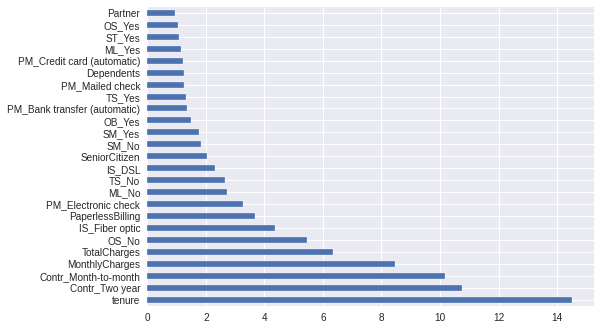

In [35]:
feat_importances = pd.Series(catb.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

### Hyper Tuning Logistic R

In [36]:
from sklearn.model_selection import GridSearchCV

def optimize_logistic_r(mx_train, my_train, my_hyper_params, hyper_to_search, hyper_search_name, cv=4, scoring='accuracy'):
    """search best param to unic one hyper param
    @mx_train, @my_train = x_train, y_train of dataset
    @my_hyper_params: dict with actuals best_params: start like: {}
      => will be accumulated and modified with each optimization iteration
      => example stater: best_hyper_params = {'random_state': 42, 'n_jobs': -1}
    @hyper_to_search: dict with key @hyper_search_name and list of values to gridSearch:
    @hyper_search_name: name of hyperparam
    """
    if(hyper_search_name in my_hyper_params.keys()):
        del my_hyper_params[hyper_search_name]
    if(hyper_search_name not in hyper_to_search.keys()):
        raise Exception('"hyper_to_search" dont have {} in dict'.format(hyper_search_name))
        
    t0 = time.time()
        
    rf = LogisticRegression(**my_hyper_params)
    
    grid_search = GridSearchCV(estimator = rf, param_grid = hyper_to_search, 
      scoring = scoring, n_jobs = -1, cv = cv)
    grid_search.fit(mx_train, my_train)
    
    print('took', time_spent(t0))
    
    data_frame_results = pd.DataFrame(
        data={'mean_fit_time': grid_search.cv_results_['mean_fit_time'],
        'mean_test_score_'+scoring: grid_search.cv_results_['mean_test_score'],
        'ranking': grid_search.cv_results_['rank_test_score']
         },
        index=grid_search.cv_results_['params']).sort_values(by='ranking')
    
    print('The Best HyperParam to "{}" is {} with {} in {}'.format(
        hyper_search_name, grid_search.best_params_[hyper_search_name], grid_search.best_score_, scoring))
    
    my_hyper_params[hyper_search_name] = grid_search.best_params_[hyper_search_name]
    
    """
    @@my_hyper_params: my_hyper_params appends best param find to @hyper_search_name
    @@data_frame_results: dataframe with statistics of gridsearch: time, score and ranking
    @@grid_search: grid serach object if it's necessary
    """
    return my_hyper_params, data_frame_results, grid_search

In [37]:
best_hyper_params = {'random_state': 42, 'n_jobs': -1} # Stater Hyper Params

In [38]:
search_hyper = {'penalty': ['l1', 'l2', 'elasticnet', 'none']}

best_hyper_params, results, last_grid_search = optimize_logistic_r(
    x_train, y_train, best_hyper_params, search_hyper, 'penalty')

took 2.950 s
The Best HyperParam to "penalty" is none with 0.8029782163365378 in accuracy


In [39]:
search_hyper = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0 , 4.0, 8.0, 16.0, 32.0, 64.0]}

best_hyper_params, results, last_grid_search = optimize_logistic_r(
    x_train, y_train, best_hyper_params, search_hyper, 'C')

took 2.876 s
The Best HyperParam to "C" is 0.0001 with 0.8029782163365378 in accuracy


In [40]:
search_hyper = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

best_hyper_params, results, last_grid_search = optimize_logistic_r(
    x_train, y_train, best_hyper_params, search_hyper, 'solver')

took 3.535 s
The Best HyperParam to "solver" is newton-cg with 0.8036900818197947 in accuracy


In [41]:
# last_grid_search

y_pred = all_classifiers['LogisiticR'].predict(x_test)
print(accuracy_score(y_test, y_pred))
class_report(y_test, y_pred, name="LogisiticR")

y_pred = last_grid_search.predict(x_test)
print(accuracy_score(y_test, y_pred))
class_report(y_test, y_pred, name="LogisiticR0")

0.8211497515968772
LogisiticR 

[[933 103]
 [149 224]] 

              precision    recall  f1-score   support

    No Churn       0.86      0.90      0.88      1036
       Churn       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

0.8190205819730305
LogisiticR0 

[[933 103]
 [152 221]] 

              precision    recall  f1-score   support

    No Churn       0.86      0.90      0.88      1036
       Churn       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [42]:
# all_classifiers['LogisiticR'].get_params()

### Super Leaner

In [43]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from mlens.ensemble import SuperLearner
 
# create a list of base-models
def get_models():
    models = list()
    models.append(LogisticRegression(**best_hyper_params))
    models.append(DecisionTreeClassifier())
    models.append(XGBClassifier())
    models.append(AdaBoostClassifier())
    models.append(CatBoostClassifier(verbose=0))
    models.append(RandomForestClassifier())
    models.append(LGBMClassifier())
    return models
 
# create the super learner
def get_super_learner(X):
    ensemble = SuperLearner(scorer=accuracy_score, folds=5, shuffle=True, sample_size=len(X), verbose=0)
    # add base models
    models = get_models()
    ensemble.add(models)
    # add the meta model
    ensemble.add_meta(LogisticRegression(**best_hyper_params))
    return ensemble

[MLENS] backend: threading


In [44]:
import time
t0 = time.time()

# create the super learner
ensemble = get_super_learner(x_train.values)

# fit the super learner
ensemble.fit(x_train.values, y_train)

# summarize base learners
print(ensemble.data)

# make predictions on hold out set
y_pred = ensemble.predict(x_test.values)

print("took ", time_spent(t0))
class_report(y_test, y_pred, name="SuperLeaner")

# y_probs = ensemble.predict_proba(x_test.values)

# roc_auc_score(y_test, y_probs)

                                   score-m  score-s   ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.80     0.01   0.95  0.07  0.09  0.01
layer-1  catboostclassifier           0.79     0.01  13.64  0.42  0.03  0.01
layer-1  decisiontreeclassifier       0.73     0.01   0.07  0.03  0.00  0.00
layer-1  lgbmclassifier               0.79     0.00   1.11  0.18  0.02  0.01
layer-1  logisticregression           0.80     0.01   2.08  0.24  0.00  0.00
layer-1  randomforestclassifier       0.78     0.01   2.05  0.12  0.13  0.01
layer-1  xgbclassifier                0.78     0.01   2.54  0.27  0.02  0.01

took  37.127 s
SuperLeaner 

[[955  81]
 [184 189]] 

              precision    recall  f1-score   support

    No Churn       0.84      0.92      0.88      1036
       Churn       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Best Model

In [45]:
y_pred = all_classifiers['LogisiticR'].predict(x_test)
print(accuracy_score(y_test, y_pred))
class_report(y_test, y_pred, name="LogisiticR")

0.8211497515968772
LogisiticR 

[[933 103]
 [149 224]] 

              precision    recall  f1-score   support

    No Churn       0.86      0.90      0.88      1036
       Churn       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



## pyCaret

https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression

In [46]:
!pip install pycaret

     |████████████████████████████████| 252 kB 403 kB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 77 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 326 kB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 44.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.3 MB/s  eta 0:00:01


     |████████████████████████████████| 2.1 MB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 37.1 MB/s eta 0:00:01


     |████████████████████████████████| 45 kB 1.7 MB/s  eta 0:00:01
  Created wheel for pyod: filename=pyod-0.8.3-py3-none-any.whl size=110347 sha256=30d717848327f91cbfb46570f4be3e58e4ff955e67affdc5dd11292bb102588c
  Stored in directory: /root/.cache/pip/wheels/fc/fc/77/6e530134c9ee2b45ef0840f0c8046b3be595624881cf533d7a
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.13-cp37-cp37m-linux_x86_64.whl size=1221861 sha256=f0177f49ce47ca9d096b8e4f8c14b91f77caec97d973adf283f0d8cad1aa5f2e
  Stored in directory: /root/.cache/pip/wheels/b9/ba/77/163f10f14bd489351530603e750c195b0ceceed2f3be2b32f1
  Created wheel for databricks-cli: filename=databricks_cli-0.11.0-py3-none-any.whl size=90300 sha256=aa223e14cc3e440014db063687d31c4f4f3c52254ace0318179ac93686b7d85d
  Stored in directory: /root/.cache/pip/wheels/81/3f/18/5678c9d403583e583a251463196998b17852b98de34aa9ab51
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.17.0-py3-none-any.whl size=16831 sha256=b

      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.6.0
    Uninstalling pandas-profiling-2.6.0:
      Successfully uninstalled pandas-profiling-2.6.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pandas-profiling 2.9.0 requires seaborn>=0.10.1, but you'll have seaborn 0.10.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [47]:
from pycaret.classification import *

In [69]:
df_pycaret = df.copy().drop(['customerID'],axis=1)

df_pycaret['Churn'] = df_pycaret['Churn'].replace(yes_no)
df_pycaret['SeniorCitizen'] = df_pycaret['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df_pycaret.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0


In [70]:
categorical_features = [f for f in df_pycaret.columns if df_pycaret.dtypes[f] == 'object']
# categorical_features

In [ ]:
# from sklearn.model_selection import train_test_split

# X = df1.drop(['Churn'], axis=1)

# y = df1['Churn']

# x_train, x_test, y_train, y_test = train_test_split(X, y.values, test_size=0.20, random_state=42)

# # https://pycaret.org/classification/

In [72]:
df_pycaret_setup = setup(data = df_pycaret,
                         target = 'Churn',
                         numeric_imputation = 'mean',
                         categorical_features = categorical_features, 
                         train_size = 0.80,
                         session_id = 42,
                         silent = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(7043, 20)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [73]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8076,0.8441,0.5518,0.6664,0.6033,0.4778,0.4818,0.1387
1,Ridge Classifier,0.8008,0.0000,0.5157,0.6603,0.5787,0.4509,0.4571,0.0108
2,Ada Boost Classifier,0.8005,0.8447,0.5304,0.6528,0.5849,0.4555,0.4600,0.4033
3,Gradient Boosting Classifier,0.7998,0.8453,0.5197,0.6548,0.5789,0.4500,0.4555,1.2285
4,Linear Discriminant Analysis,0.7992,0.8387,0.5612,0.6399,0.5975,0.4646,0.4667,0.0374
5,CatBoost Classifier,0.7987,0.8405,0.5164,0.6529,0.5762,0.4467,0.4522,5.4399
6,Light Gradient Boosting Machine,0.7968,0.8366,0.5197,0.6460,0.5754,0.4440,0.4489,0.1944
7,Extreme Gradient Boosting,0.7882,0.8268,0.5110,0.6241,0.5615,0.4238,0.4277,1.2025
8,Random Forest Classifier,0.7755,0.7908,0.4361,0.6076,0.5072,0.3670,0.3757,0.1142
9,Extra Trees Classifier,0.7691,0.7835,0.4762,0.5793,0.5225,0.3721,0.3754,0.5964


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lr_pycaret  = create_model('lr')     

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8440,0.8731,0.6333,0.7422,0.6835,0.5808,0.5840
1,0.8245,0.8509,0.6000,0.6977,0.6452,0.5294,0.5321
2,0.8156,0.8516,0.5533,0.6917,0.6148,0.4956,0.5009
3,0.7961,0.8504,0.4867,0.6577,0.5594,0.4306,0.4388
4,0.8206,0.8534,0.5369,0.7143,0.6130,0.4993,0.5079
5,0.8064,0.8482,0.5638,0.6562,0.6065,0.4791,0.4815
6,0.7869,0.8474,0.5235,0.6142,0.5652,0.4252,0.4276
7,0.7940,0.8235,0.5369,0.6299,0.5797,0.4444,0.4469
8,0.8011,0.8294,0.5570,0.6434,0.5971,0.4660,0.4681
9,0.7869,0.8128,0.5267,0.6172,0.5683,0.4280,0.4304


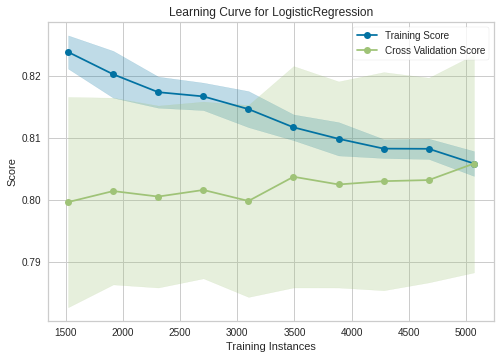

In [76]:
plot_model(estimator = lr_pycaret, plot = 'learning')

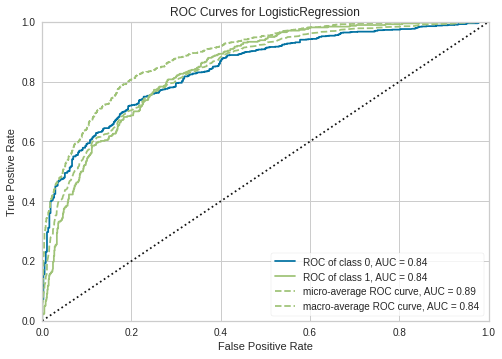

In [77]:
plot_model(estimator = lr_pycaret, plot = 'auc')

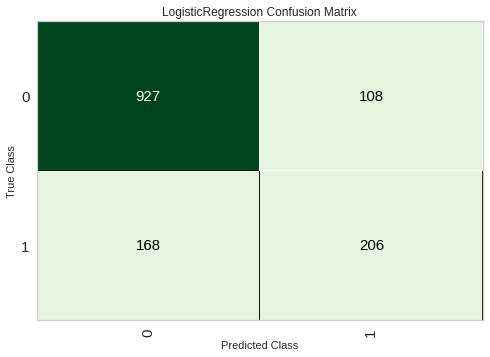

In [78]:
plot_model(estimator = lr_pycaret, plot = 'confusion_matrix')

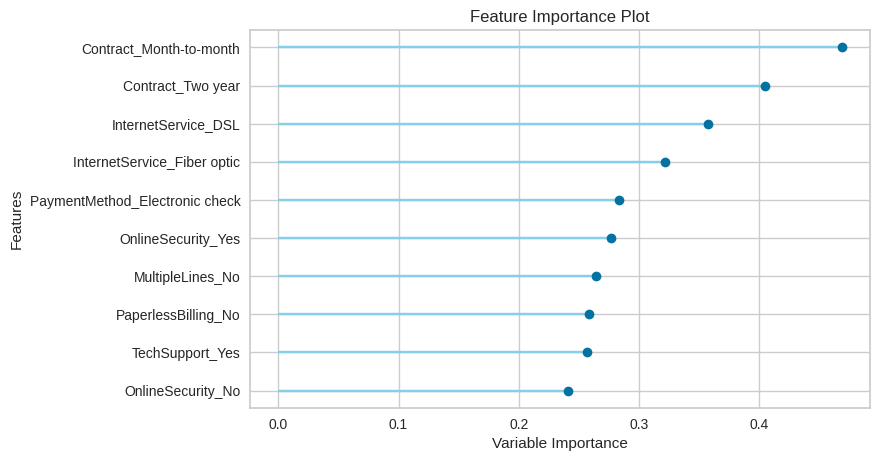

In [79]:
plot_model(estimator = lr_pycaret, plot = 'feature')

## Conclusion

This kernel is not finished. If you think that it's useful, votes up the kernel